In [21]:
import pandas as pd

### Read records from Electric Vehicles data file

In [22]:
ev_data = pd.read_csv('data/ev.csv')
ev_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,121976.000000,121978.00000,121978.000000,121978.000000,121681.000000,1.219780e+05,1.219760e+05
mean,98159.128451,2019.30890,81.301407,1627.059798,29.738760,2.029409e+08,5.297007e+10
std,2602.756790,2.95635,100.890849,10267.478923,14.737141,8.979138e+07,1.659161e+09
min,1730.000000,1997.00000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.00000,0.000000,0.000000,18.000000,1.523397e+08,5.303301e+10
50%,98121.000000,2020.00000,25.000000,0.000000,34.000000,1.967532e+08,5.303303e+10
75%,98370.000000,2022.00000,200.000000,0.000000,43.000000,2.258338e+08,5.305307e+10
max,99701.000000,2023.00000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


### Read a sample record from the file

In [23]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


In [24]:
ev_data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [25]:
ev_data.Make.describe()

count     121978
unique        35
top        TESLA
freq       56116
Name: Make, dtype: object

In [26]:
### Replacing spaces in column names with '_' for easy access during analysis

In [27]:
ev_data.columns = [col.replace(' ', '_') for col in ev_data.columns]
ev_data.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [28]:
ev_data.Electric_Vehicle_Type.describe()

count                             121978
unique                                 2
top       Battery Electric Vehicle (BEV)
freq                               94118
Name: Electric_Vehicle_Type, dtype: object

In [29]:
ev_data.Electric_Vehicle_Type.value_counts()

Electric_Vehicle_Type
Battery Electric Vehicle (BEV)            94118
Plug-in Hybrid Electric Vehicle (PHEV)    27860
Name: count, dtype: int64

In [30]:
ev_data.Electric_Vehicle_Type.value_counts(normalize=True)

Electric_Vehicle_Type
Battery Electric Vehicle (BEV)            0.771598
Plug-in Hybrid Electric Vehicle (PHEV)    0.228402
Name: proportion, dtype: float64

In [31]:
ev_data.Electric_Vehicle_Type.unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

### Let's create a Crosstab to show How many types of Electric vehicles are made by each Make

In [32]:
pd.crosstab(ev_data.Make, ev_data.Electric_Vehicle_Type)

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Make,,
AUDI,1254,1206
AZURE DYNAMICS,7,0
BENTLEY,0,3
BMW,1172,4178
CADILLAC,3,106
CHEVROLET,5880,4895
CHRYSLER,0,1885
FIAT,809,0
FISKER,0,17


In [33]:
ev_data.Model_Year.describe()

count    121978.00000
mean       2019.30890
std           2.95635
min        1997.00000
25%        2018.00000
50%        2020.00000
75%        2022.00000
max        2023.00000
Name: Model_Year, dtype: float64

In [34]:
ev_data.Model_Year.value_counts()

Model_Year
2022    27742
2021    18494
2018    14344
2020    10943
2019    10424
2023     9997
2017     8570
2016     5682
2015     4944
2013     4623
2014     3636
2012     1681
2011      833
2010       25
2008       22
2000        9
1999        4
2002        2
1997        1
2003        1
1998        1
Name: count, dtype: int64

### Let's create a Histogram Plot using Model Year

In [35]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\prakh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


<Axes: ylabel='Frequency'>

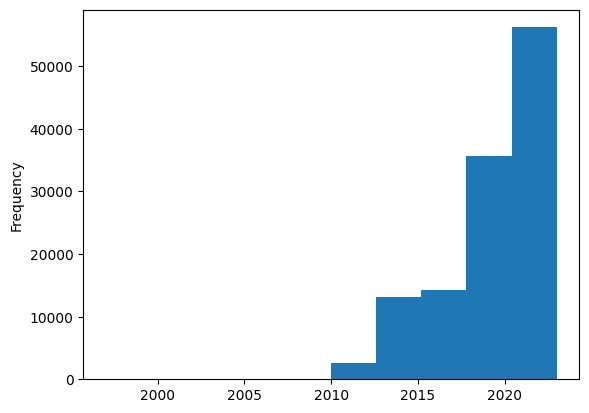

In [36]:
ev_data.Model_Year.plot(kind='hist')

<Axes: xlabel='Make'>

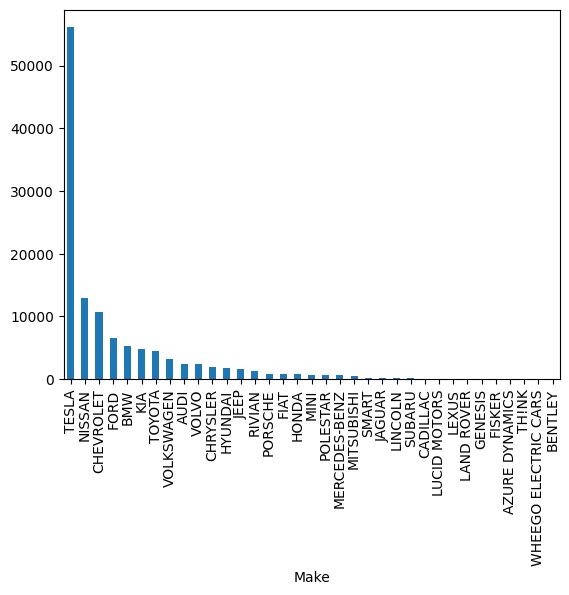

In [37]:
ev_data.Make.value_counts().plot(kind='bar')

In [40]:
ev_data.to_csv('ev_output.csv')
